Clasificación multicase

CONJUNTO DE DATOS DE REUTERS

In [33]:
# Cargar el conjunto de datos de Reuters

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [34]:
# Descodificar noticias para convertirlas a texto


word_index = reuters.get_word_index()#word_index es un diccionario qyue asigna palabras a un dindice de enteros
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]#Lo invierte asignando indices de enteros a palabras
 )
decoded_review = ''.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

print(decoded_review)

???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


PREPARACIÓN DE LOS DATOS

In [35]:
# Codificación de  los datos 

import numpy as np

def vectorize_sequeces(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorización de las muestras
x_Train = vectorize_sequeces(train_data)
x_test = vectorize_sequeces(test_data)

# Codigficación de las etiquetas (vamos a utilizar directamente la manera integrada de keras)

from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

CREACIÓN DE LA RED

In [36]:
# Definición del modelo

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))



In [37]:
# Compilar el modelo
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

VALIDACIÓN DEL ENFOQUE

In [38]:
# Separar un conjunto de validación

x_val = x_Train[:1000]
partial_x_train = x_Train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [39]:
# Entrenamiento del modelo

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.6237 - acc: 0.5200 - val_loss: 1.7674 - val_acc: 0.6230
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5061 - acc: 0.6814 - val_loss: 1.3669 - val_acc: 0.6780
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1772 - acc: 0.7365 - val_loss: 1.1905 - val_acc: 0.7290
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9664 - acc: 0.7854 - val_loss: 1.0786 - val_acc: 0.7580
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.7988 - acc: 0.8285 - val_loss: 0.9975 - val_acc: 0.7810
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6675 - acc: 0.8604 - val_loss: 0.9334 - val_acc: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5528 - acc: 0.8831 - val_loss: 0.9070 - val_acc: 0.8020
Epoch 8/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4624 - a

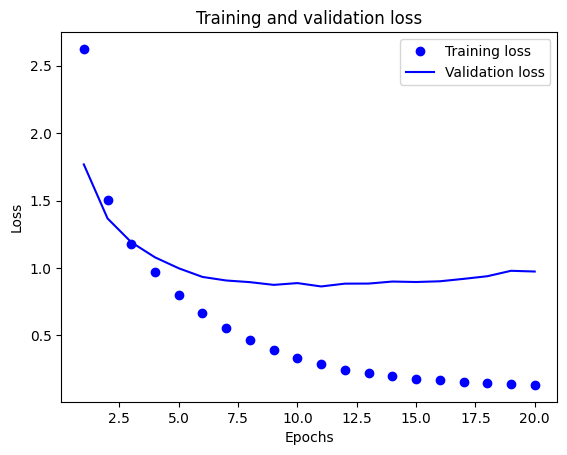

In [40]:
# Trazar la pérdida del entrenamiento y de validación

import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

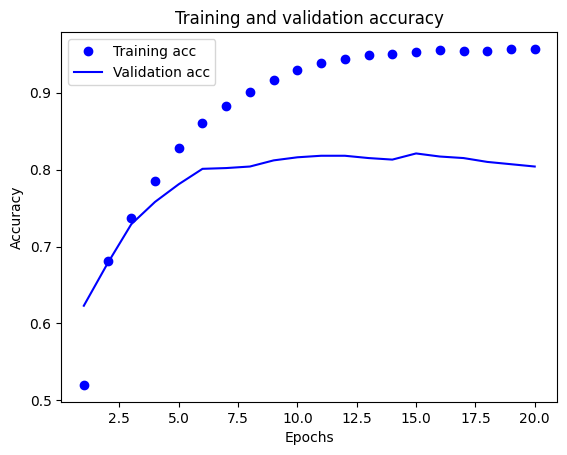

In [42]:
# Trazar la exactitud del entrenamiento y de validación

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
# Volver a entrenar el modelo desde cero

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.8698 - acc: 0.4878 - val_loss: 1.9512 - val_acc: 0.5970
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.6493 - acc: 0.6606 - val_loss: 1.4383 - val_acc: 0.6770
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.2501 - acc: 0.7263 - val_loss: 1.2246 - val_acc: 0.7200
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0160 - acc: 0.7824 - val_loss: 1.1143 - val_acc: 0.7490
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8451 - acc: 0.8180 - val_loss: 1.0574 - val_acc: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7071 - acc: 0.8499 - val_loss: 0.9748 - val_acc: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5977 - acc: 0.8761 - val_loss: 0.9257 - val_acc: 0.8080
Epoch 8/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4987 - a

GENERAR PREDICCIONES SOBRE DATOS NUEVOS

In [44]:
predictions = model.predict(x_test)


71/71 [==============================] - 0s 1ms/step
